In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import Augmentor



In [2]:
# Data directories
data_dir_train = pathlib.Path("C:\Major Project 2023 7th sem\DATA SET\Train")
data_dir_test = pathlib.Path("C:\Major Project 2023 7th sem\DATA SET\Test")


In [5]:
# Count images
image_count_train = len(list(data_dir_train.glob('*.jpg')))
image_count_test = len(list(data_dir_test.glob('*.jpg')))
print("Train Image Count:", image_count_train)
print("Test Image Count:", image_count_test)


Train Image Count: 0
Test Image Count: 0


In [6]:
# Parameters
batch_size = 32
img_height = 180
img_width = 180
num_classes = 9  # Update this with the number of classes in your dataset


In [7]:
# Data preprocessing and augmentation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 2322 files belonging to 9 classes.
Using 1858 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 2322 files belonging to 9 classes.
Using 464 files for validation.


In [9]:
# Class names
class_names = train_ds.class_names
print("Class Names:", class_names)



Class Names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [10]:
# Data augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)


c:\Users\91939\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Model
base_model = keras.applications.DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False



In [15]:
from tensorflow.keras import layers

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes)
])


In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [17]:
# Train the model
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.2410 - loss: 2.1294 - val_accuracy: 0.3815 - val_loss: 1.6776
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.3985 - loss: 1.6520 - val_accuracy: 0.4504 - val_loss: 1.5695
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.4584 - loss: 1.5486 - val_accuracy: 0.4892 - val_loss: 1.4871
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.4478 - loss: 1.5002 - val_accuracy: 0.4978 - val_loss: 1.4630
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.5038 - loss: 1.4257 - val_accuracy: 0.5129 - val_loss: 1.4198
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.5262 - loss: 1.3423 - val_accuracy: 0.5194 - val_loss: 1.3782
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5494 - loss: 1.2935 - val_accuracy: 0.5474 - val_loss: 1.3401
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.5618 - loss: 1.2743 - val_accuracy: 0.5409 - val

In [20]:
# Plotting training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)


Text(0, 0.5, 'Accuracy')

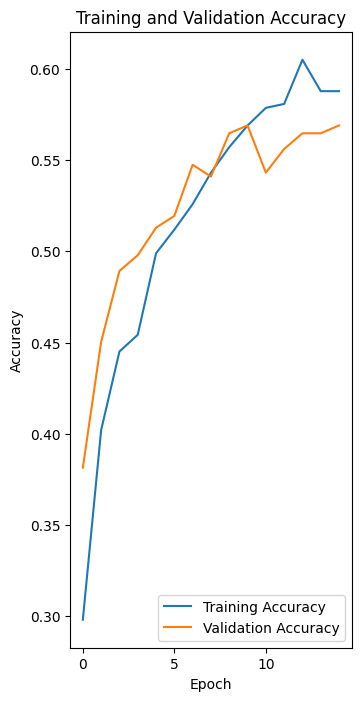

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')



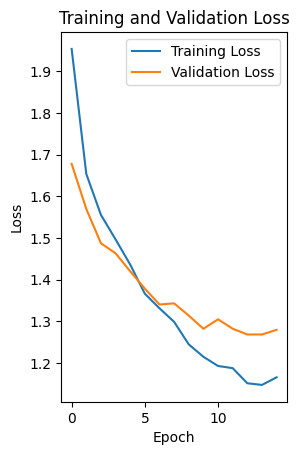

In [21]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()